# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

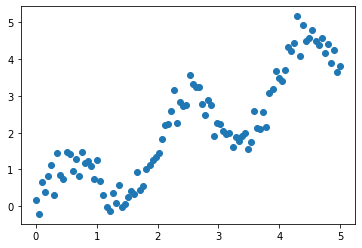

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5483375021413872


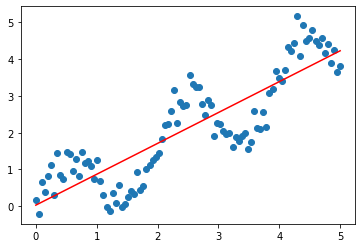

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

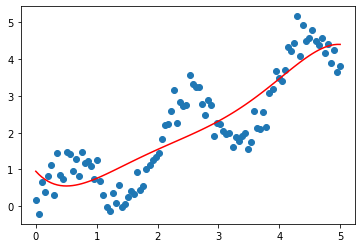

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.8370485   2.61502932 -1.20779857  0.25652888 -0.01987025]
interception:  0.9497483658462411


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b #要記得轉置！！！！！！！！！

array([0.94974837, 0.86348452, 0.78965089, 0.72737301, 0.6758149 ,
       0.63417829, 0.60170182, 0.5776603 , 0.56136387, 0.55215725,
       0.54941895, 0.55256049, 0.56102561, 0.57428948, 0.59185794,
       0.6132667 , 0.63808054, 0.66589257, 0.69632341, 0.7290204 ,
       0.76365687, 0.7999313 , 0.83756655, 0.87630909, 0.91592823,
       0.95621528, 0.99698284, 1.03806394, 1.07931133, 1.12059665,
       1.16180965, 1.20285743, 1.24366364, 1.28416768, 1.32432396,
       1.36410107, 1.40348103, 1.4424585 , 1.48103996, 1.519243  ,
       1.55709546, 1.59463469, 1.63190676, 1.66896567, 1.70587257,
       1.74269498, 1.779506  , 1.81638352, 1.85340945, 1.89066893,
       1.92824957, 1.9662406 , 2.00473218, 2.04381454, 2.08357721,
       2.12410829, 2.1654936 , 2.20781592, 2.25115423, 2.29558288,
       2.34117087, 2.38798099, 2.4360691 , 2.48548331, 2.53626321,
       2.5884391 , 2.64203118, 2.69704876, 2.75348953, 2.81133871,
       2.87056832, 2.93113637, 2.99298606, 3.05604503, 3.12022

In [15]:
regr_poly.predict(X_poly)

array([0.94974837, 0.86348452, 0.78965089, 0.72737301, 0.6758149 ,
       0.63417829, 0.60170182, 0.5776603 , 0.56136387, 0.55215725,
       0.54941895, 0.55256049, 0.56102561, 0.57428948, 0.59185794,
       0.6132667 , 0.63808054, 0.66589257, 0.69632341, 0.7290204 ,
       0.76365687, 0.7999313 , 0.83756655, 0.87630909, 0.91592823,
       0.95621528, 0.99698284, 1.03806394, 1.07931133, 1.12059665,
       1.16180965, 1.20285743, 1.24366364, 1.28416768, 1.32432396,
       1.36410107, 1.40348103, 1.4424585 , 1.48103996, 1.519243  ,
       1.55709546, 1.59463469, 1.63190676, 1.66896567, 1.70587257,
       1.74269498, 1.779506  , 1.81638352, 1.85340945, 1.89066893,
       1.92824957, 1.9662406 , 2.00473218, 2.04381454, 2.08357721,
       2.12410829, 2.1654936 , 2.20781592, 2.25115423, 2.29558288,
       2.34117087, 2.38798099, 2.4360691 , 2.48548331, 2.53626321,
       2.5884391 , 2.64203118, 2.69704876, 2.75348953, 2.81133871,
       2.87056832, 2.93113637, 2.99298606, 3.05604503, 3.12022

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

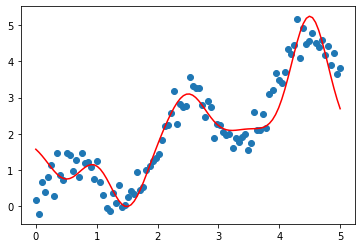

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.08604381 -1.85399882  1.26192197  0.27282287  3.39861884]
interception:  1.8448767852733594


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

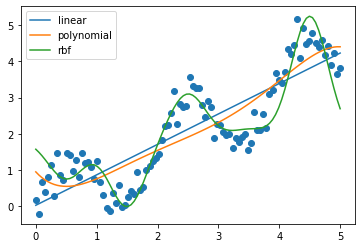

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5483375021413872


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.48914038373401


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.24736227455226018
